<a href="https://colab.research.google.com/github/tajski/Projekt-Sieci-Neuronowe/blob/main/Projekt_Sieci_Neuronowe_BT_KW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
from matplotlib import pyplot as plt
from keras.utils import image_dataset_from_directory
from keras import layers, Model
from keras.models import Sequential
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Accuracy
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D

In [13]:
drive.mount('/content/drive', force_remount=True)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/diabetic.zip"

Mounted at /content/drive
replace test/DR/00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test/DR/0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [14]:
train_data_root = "train"
test_data_root = "test"
valid_data_root = "valid"

train_data = {}
test_data = {}
valid_data = {}

# Przechodzenie przez katalogi treningowe
for root, dirs, files in os.walk(train_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        train_data[dir] = os.listdir(dir_path)

print("Dane treningowe:")
for x in train_data:
    print(x, len(train_data[x]))

# Przechodzenie przez katalogi testowe
for root, dirs, files in os.walk(test_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        test_data[dir] = os.listdir(dir_path)

print()

print("Dane testowe:")
for x in test_data:
    print(x, len(test_data[x]))

    # Przechodzenie przez katalogi walidacyjne
for root, dirs, files in os.walk(valid_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        valid_data[dir] = os.listdir(dir_path)

print()

print("Dane treningowe:")
for x in valid_data:
    print(x, len(valid_data[x]))

Dane treningowe:
No_DR 1026
DR 1050

Dane testowe:
No_DR 118
DR 113

Dane treningowe:
No_DR 286
DR 245


In [15]:
train_dataset, valid_dataset = image_dataset_from_directory(train_data_root, validation_split=0.2,
                                       subset='both',
                                       seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

test_dataset = image_dataset_from_directory(test_data_root, seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

Found 2076 files belonging to 2 classes.
Using 1661 files for training.
Using 415 files for validation.
Found 231 files belonging to 2 classes.


['DR', 'No_DR']


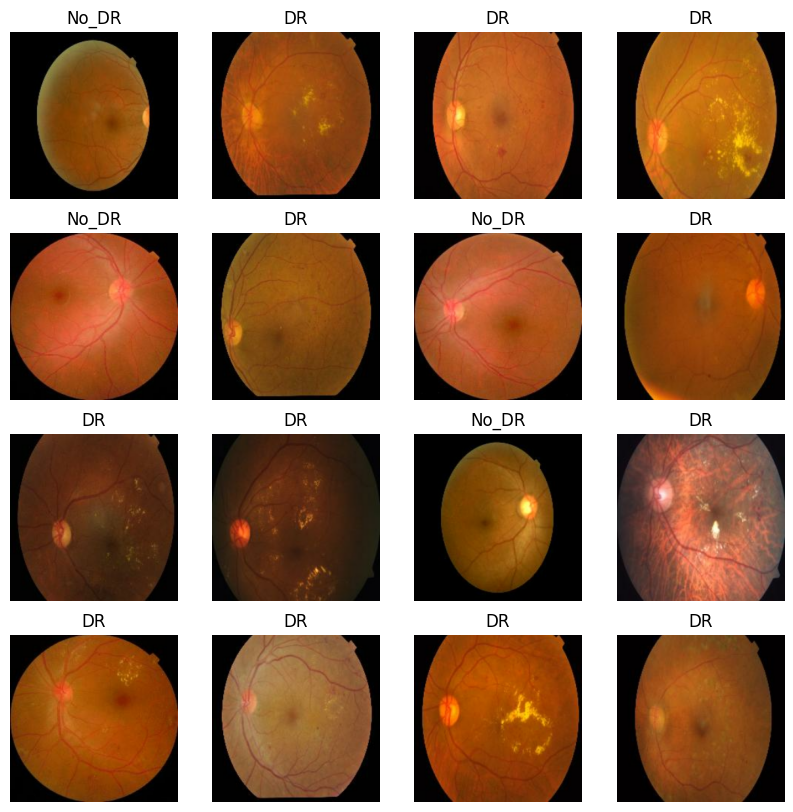

In [16]:
class_names = train_dataset.class_names
print(class_names)

%matplotlib inline
fig, ax = plt.subplots(4,4, figsize=(10,10))


for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.argmax(labels[i]))])
        plt.axis("off")

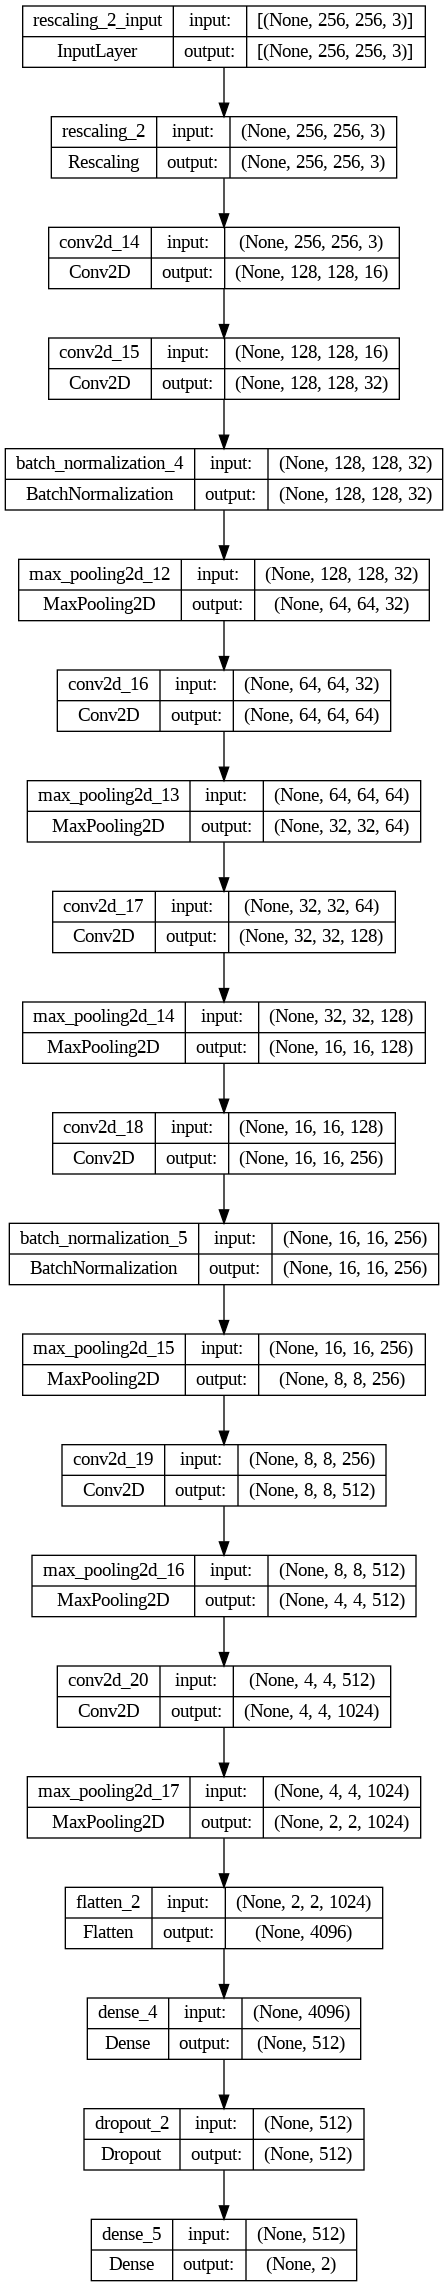

In [17]:
modelCNN = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(2, activation="softmax")
])
plot_model(modelCNN, show_shapes=True)

In [18]:
# Kompilacja
modelCNN.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN = modelCNN.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
52/52 [==============================] - 6s 59ms/step - loss: 1.0078 - accuracy: 0.7562 - val_loss: 0.7054 - val_accuracy: 0.4916
Epoch 2/40
52/52 [==============================] - 5s 84ms/step - loss: 0.2579 - accuracy: 0.8989 - val_loss: 0.8060 - val_accuracy: 0.4916
Epoch 3/40
52/52 [==============================] - 3s 57ms/step - loss: 0.2090 - accuracy: 0.9163 - val_loss: 0.9010 - val_accuracy: 0.4916
Epoch 4/40
52/52 [==============================] - 3s 58ms/step - loss: 0.1970 - accuracy: 0.9253 - val_loss: 0.7917 - val_accuracy: 0.4916
Epoch 5/40
52/52 [==============================] - 3s 53ms/step - loss: 0.1885 - accuracy: 0.9278 - val_loss: 1.3250 - val_accuracy: 0.4916
Epoch 6/40
52/52 [==============================] - 4s 79ms/step - loss: 0.1719 - accuracy: 0.9440 - val_loss: 1.8102 - val_accuracy: 0.4916
Epoch 7/40
52/52 [==============================] - 3s 57ms/step - loss: 0.1616 - accuracy: 0.9446 - val_loss: 1.3130 - val_accuracy: 0.4916
Epoch 8/40
52

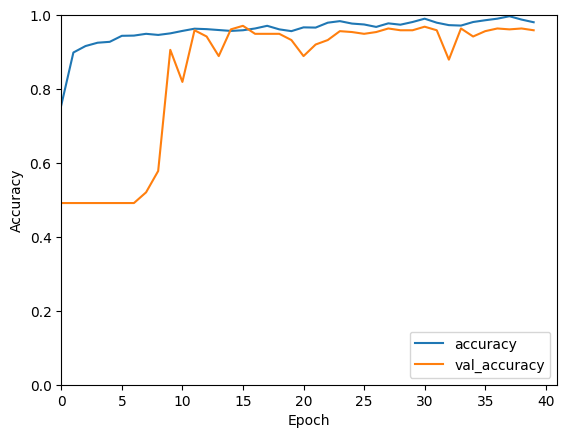

In [19]:
plt.plot(historyCNN.history['accuracy'], label='accuracy')
plt.plot(historyCNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')